In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv("users.dat", sep="::", header=None)

print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
0    6040 non-null int64
1    6040 non-null object
2    6040 non-null int64
3    6040 non-null int64
4    6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None


/home/nicola/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
usersHeader = ["userID", "gender", "age", "occupation", "zipCode"]
users.columns = usersHeader
users.head(10)

,userID,gender,age,occupation,zipCode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [4]:
modified = []

def clean_zipCode(value):
    t = value.split("-")
    if(len(t) > 1):
        global modified
        modified.append(t)
    return int(t[0])


users["zipCode"] = users["zipCode"].apply(clean_zipCode)

print(users.info())

print("modified {} elements".format(len(modified)))
print(modified)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
userID        6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zipCode       6040 non-null int64
dtypes: int64(4), object(1)
memory usage: 236.0+ KB
None
modified 66 elements
[['98107', '2117'], ['37919', '4204'], ['55337', '4056'], ['55405', '2546'], ['55103', '1006'], ['52570', '9634'], ['01702', '7224'], ['20744', '6223'], ['20110', '5616'], ['48103', '8929'], ['53404', '1230'], ['68144', '2410'], ['93420', '2852'], ['84112', '2004'], ['92612', '3417'], ['23464', '3016'], ['72227', '5733'], ['92683', '1892'], ['98043', '3621'], ['11710', '1641'], ['33067', '1400'], ['02136', '1522'], ['37923', '3112'], ['27713', '9225'], ['88005', '4313'], ['95451', '9554'], ['48103', '4711'], ['64081', '8102'], ['80004', '4448'], ['50265', '2850'], ['08854', '3115'], ['27514', '3540'], ['15701', '1348'], ['91790', '1161']

In [5]:
mod_age = 0

def clean_age(age):
    if age==1:
        return 6+(18-6)/2
    elif age==18:
        return age+(24-18)/2
    elif age==25:
        return age+(34-25)/2
    elif age==35:
        return age+(44-35)/2
    elif age==45:
        return age+(49-45)/2
    elif age==50:
        return age+(55-50)/2
    elif age==56:
        return age+(80-56)/2
    else:
        global mod_age
        mod_age = mod_age+1
        return np.nan

users["age"] = users["age"].apply(clean_age)
print("mod_age Nan: {}".format(mod_age))


mod_age Nan: 0


In [6]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
# users["occupation"].replace(occu, inplace=True)

In [7]:
zipp = pd.read_csv("zip.csv")
print(zipp.info())

print(zipp.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81831 entries, 0 to 81830
Data columns (total 20 columns):
RecordNumber           81831 non-null int64
Zipcode                81831 non-null int64
ZipCodeType            81831 non-null object
City                   81831 non-null object
State                  81831 non-null object
LocationType           81831 non-null object
Lat                    81178 non-null float64
Long                   81178 non-null float64
Xaxis                  81831 non-null float64
Yaxis                  81831 non-null float64
Zaxis                  81831 non-null float64
WorldRegion            334 non-null object
Country                81831 non-null object
LocationText           81180 non-null object
Location               81830 non-null object
Decommisioned          81831 non-null bool
TaxReturnsFiled        58447 non-null float64
EstimatedPopulation    58447 non-null float64
TotalWages             58354 non-null float64
Notes                  1844 non-nu

/home/nicola/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
zipp = zipp[["Zipcode", "City", "State", "Lat", "Long", "Country"]]
zipp.columns = ["zipCode", "city", "state", "lat", "long", "country"]

In [9]:
zipp.head(2)

,zipCode,city,state,lat,long,country
0,704,PARC PARQUE,PR,17.96,-66.22,US
1,704,PASEO COSTA DEL SUR,PR,17.96,-66.22,US


In [10]:
zipp["zipCode"].value_counts()

926      130
725       82
662       75
969       73
612       68
953       55
693       54
646       50
716       49
959       48
727       47
949       47
791       47
736       47
738       46
698       45
728       45
778       44
674       44
976       44
680       43
623       42
784       41
966       40
924       39
730       39
682       38
795       38
956       38
987       36
        ... 
94603      1
63738      1
45363      1
51452      1
49405      1
53503      1
67844      1
71942      1
96522      1
98581      1
10528      1
6438       1
24873      1
16685      1
22830      1
37175      1
96650      1
57657      1
76096      1
72006      1
94539      1
86351      1
4455       1
20847      1
35188      1
63866      1
78211      1
92552      1
90505      1
4098       1
Name: zipCode, Length: 42522, dtype: int64

In [11]:
# many cities have the same zipCode, I drop some value otherwise 
# the join goes bad

zipp = zipp.drop_duplicates(subset="zipCode", keep="first")

zipp["zipCode"].value_counts()

2047     1
30180    1
24033    1
87520    1
44511    1
42462    1
48605    1
77054    1
96679    1
99802    1
40409    1
70606    1
58838    1
62932    1
50642    1
74340    1
54736    1
11727    1
75214    1
19939    1
32229    1
23541    1
28135    1
87552    1
90075    1
48637    1
70005    1
33673    1
38392    1
92124    1
        ..
23326    1
82717    1
84764    1
95003    1
97050    1
27416    1
21780    1
72470    1
2836     1
49965    1
56110    1
23514    1
23358    1
73645    1
39750    1
99141    1
35652    1
45891    1
47938    1
43840    1
17213    1
74545    1
95035    1
31546    1
25401    1
70455    1
821      1
68404    1
13107    1
65536    1
Name: zipCode, Length: 42522, dtype: int64

In [12]:
full = pd.merge(users, zipp, how="inner", on="zipCode")

print(full.head(2))

print("\nlost {} values in the join".format( users.shape[0]-full.shape[0] ))

   userID gender   age  occupation  zipCode       city state   lat   long  \
0       1      F  12.0          10    48067  ROYAL OAK    MI  42.5 -83.15   
1     583      F  29.5           0    48067  ROYAL OAK    MI  42.5 -83.15   

  country  
0      US  
1      US  

lost 68 values in the join


In [13]:
print(full["state"].value_counts())

CA    1100
NY     464
MN     432
TX     311
MA     298
IL     287
MI     254
OH     220
WA     198
PA     177
VA     174
FL     159
WI     138
NJ     130
OR     117
CO     101
TN      98
NC      94
GA      91
MD      86
AZ      84
IN      80
CT      79
MO      79
IA      57
ME      51
KY      46
NH      43
OK      42
NV      39
KS      39
LA      35
SC      34
DC      32
UT      32
AR      29
NM      25
HI      24
AL      23
RI      22
NE      21
WV      16
DE      15
VT      14
ID      13
MT      12
SD      10
MS       9
AK       9
ND       8
WY       7
PR       6
AE       4
AP       3
GU       1
Name: state, dtype: int64


In [14]:
ca_mask = full["state"].astype("str") == "CA"
len(ca_mask)

ca = full[ca_mask]

ca.head(10)

,userID,gender,age,occupation,zipCode,city,state,lat,long,country
41,10,F,39.5,1,95370,SONORA,CA,37.98,-120.39,US
42,535,M,39.5,6,95370,SONORA,CA,37.98,-120.39,US
45,13,M,47.0,1,93304,BAKERSFIELD,CA,35.33,-119.02,US
67,17,M,52.5,1,95350,MODESTO,CA,37.67,-121.01,US
68,18,F,21.0,3,95825,SACRAMENTO,CA,38.58,-121.40,US
69,93,M,29.5,17,95825,SACRAMENTO,CA,38.58,-121.40,US
99,23,M,39.5,0,90049,LOS ANGELES,CA,34.08,-118.49,US
100,1637,M,68.0,0,90049,LOS ANGELES,CA,34.08,-118.49,US
101,2788,M,68.0,1,90049,LOS ANGELES,CA,34.08,-118.49,US
147,36,M,29.5,3,94123,SAN FRANCISCO,CA,37.80,-122.43,US


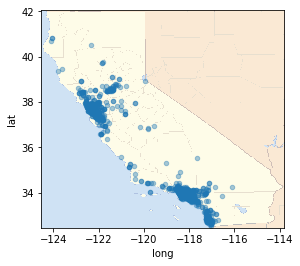

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

california_img = mpimg.imread('california.png')

plt.figure(figsize=(20,20))

ax = ca.plot(kind="scatter", x="long", y="lat", alpha=0.4)

plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))

plt.show()

In [16]:
occu = {
    0:"other",
    1:"academic/educator",
    2:"artist",
    3:"clerical/admin",
    4:"college/grad student",
    5:"customer service",
    6:"doctor/health care",
    7:"executive/managerial",
    8:"farmer",
    9:"homemaker",
    10:"K-12 student",
    11:"lawyer",
    12:"programmer",
    13:"retired",
    14:"sales/marketing",
    15:"scientist",
    16:"self-employed",
    17:"technician/engineer",
    18:"tradesman/craftsman",
    19:"unemployed",
    20:"writer"}


# maybe not the case, too much space, only for plots
users["occupation"].replace(occu, inplace=True)

In [17]:
users.head(3)

,userID,gender,age,occupation,zipCode
0,1,F,12.0,K-12 student,48067
1,2,M,68.0,self-employed,70072
2,3,M,29.5,scientist,55117


M    4331
F    1709
Name: gender, dtype: int64


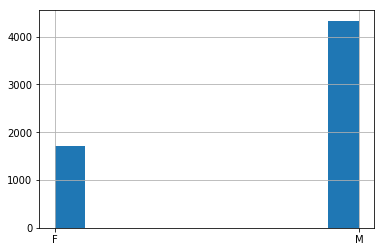

In [18]:
print(users["gender"].value_counts(dropna=False))
users["gender"].hist()


29.5    2096
39.5    1193
21.0    1103
47.0     550
52.5     496
68.0     380
12.0     222
Name: age, dtype: int64


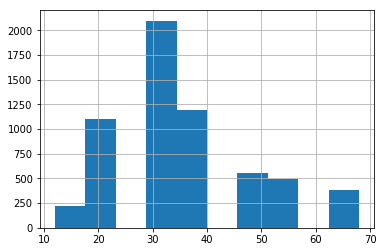

In [19]:
print(users["age"].value_counts(dropna=False))
users["age"].hist()

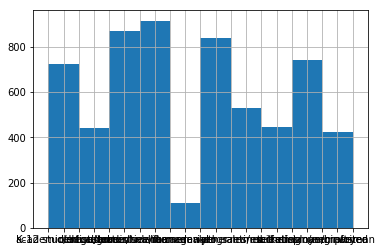

In [20]:
users["occupation"].hist()

In [21]:
u_go = users.groupby(["gender", "occupation"]).size()
print(u_go)

gender  occupation          
F       K-12 student             66
        academic/educator       209
        artist                   91
        clerical/admin          100
        college/grad student    234
        customer service         31
        doctor/health care      102
        executive/managerial    139
        farmer                    3
        homemaker                89
        lawyer                   22
        other                   232
        programmer               50
        retired                  34
        sales/marketing          79
        scientist                28
        self-employed            51
        technician/engineer      52
        tradesman/craftsman       4
        unemployed               15
        writer                   78
M       K-12 student            129
        academic/educator       319
        artist                  176
        clerical/admin           73
        college/grad student    525
        customer service         81

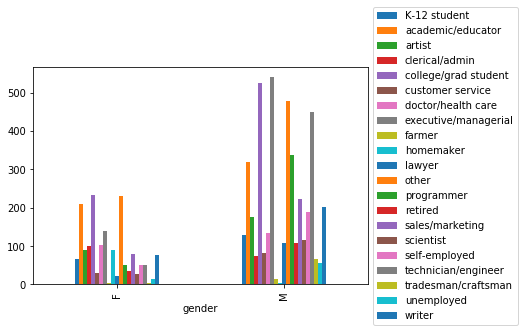

In [22]:
u_go.unstack().plot(kind='bar',).legend(loc='best', bbox_to_anchor=(1, 1.3))
plt.show()

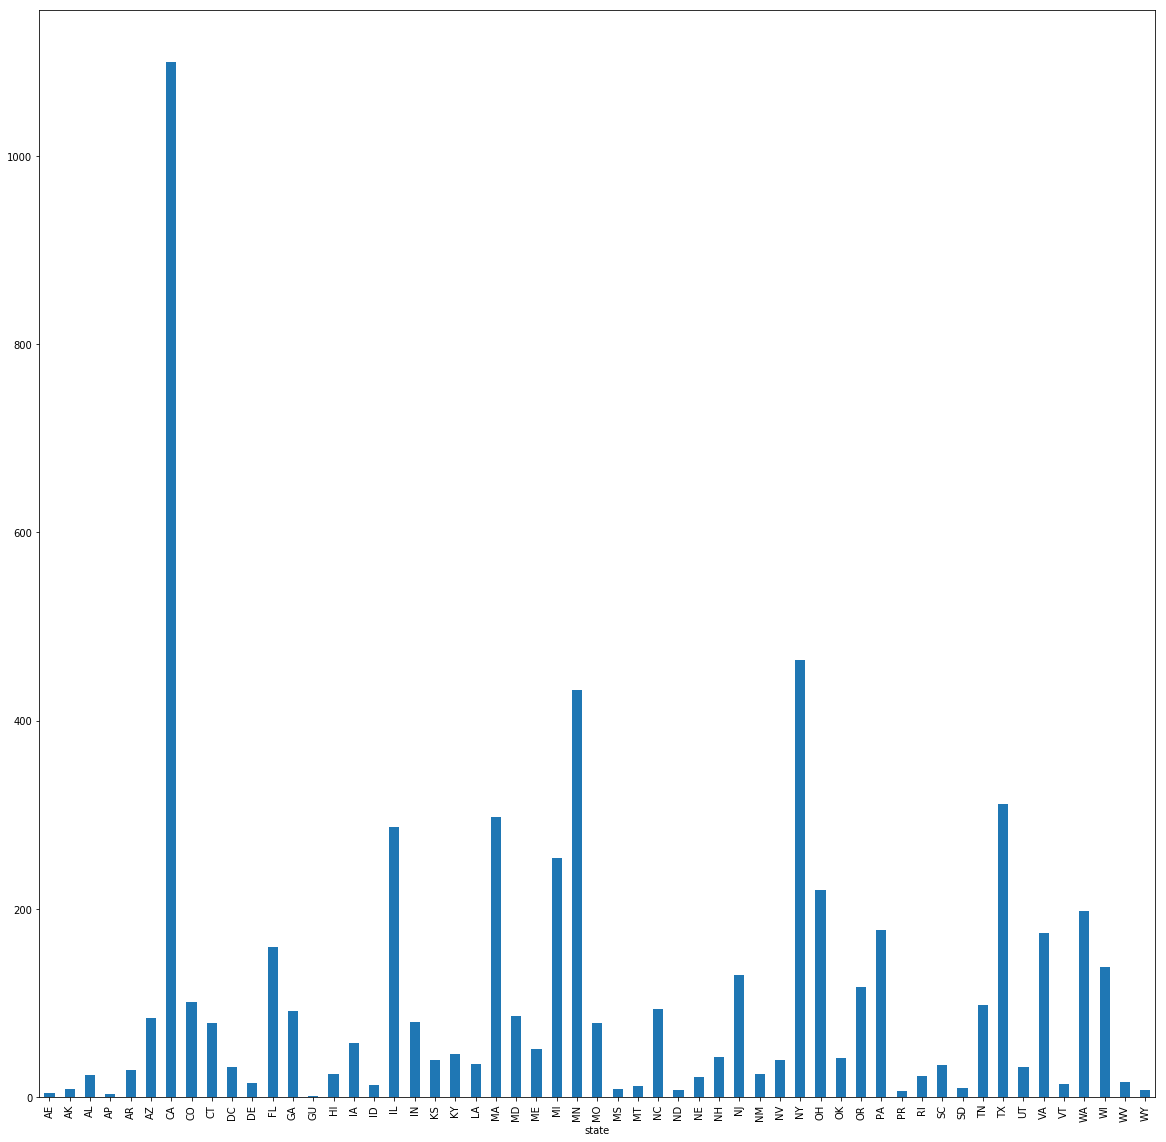

In [23]:
f_state = full.groupby("state").size()
#print(f_state)

plt.figure(figsize=(20,20))
f_state.plot(kind="bar")

In [29]:
state_mask = (full["state"].astype("str") == "CA") | (full["state"].astype("str") == "NY")
# | (full["state"].astype("str") == "MN") | (full["state"].astype("str") == "TX")
# state_mask_ca = full["state"].astype("str") in ["CA", "NY"]

state_mask 
print(state_mask.shape)

# type(full[state_mask]["state"])
# print(full[state_mask]["state"])

(5972,)


In [33]:
cany = full[state_mask].groupby(["state", "occupation"]).size()

cany

state  occupation
CA     0             130
       1              83
       2              66
       3              27
       4             116
       5              16
       6              38
       7             120
       8               4
       9               8
       10             24
       11             14
       12             83
       13             31
       14             57
       15             40
       16             43
       17            104
       18              4
       19             15
       20             77
NY     0              61
       1              39
       2              31
       3               8
       4              50
       5               9
       6              13
       7              75
       8               2
       9               6
       10             14
       11             13
       12             23
       13             10
       14             20
       15              7
       16             22
       17             17
       

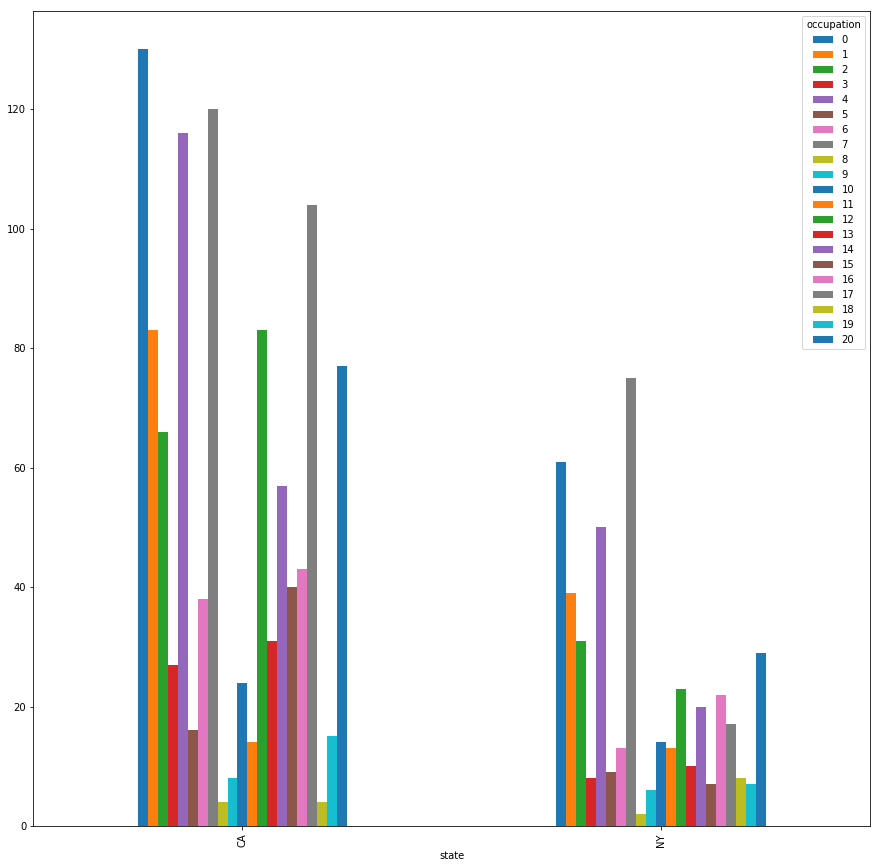

In [40]:
cany.unstack().plot(kind='bar',figsize=(15,15)) #.legend(loc='best', bbox_to_anchor=(1, 1.3))


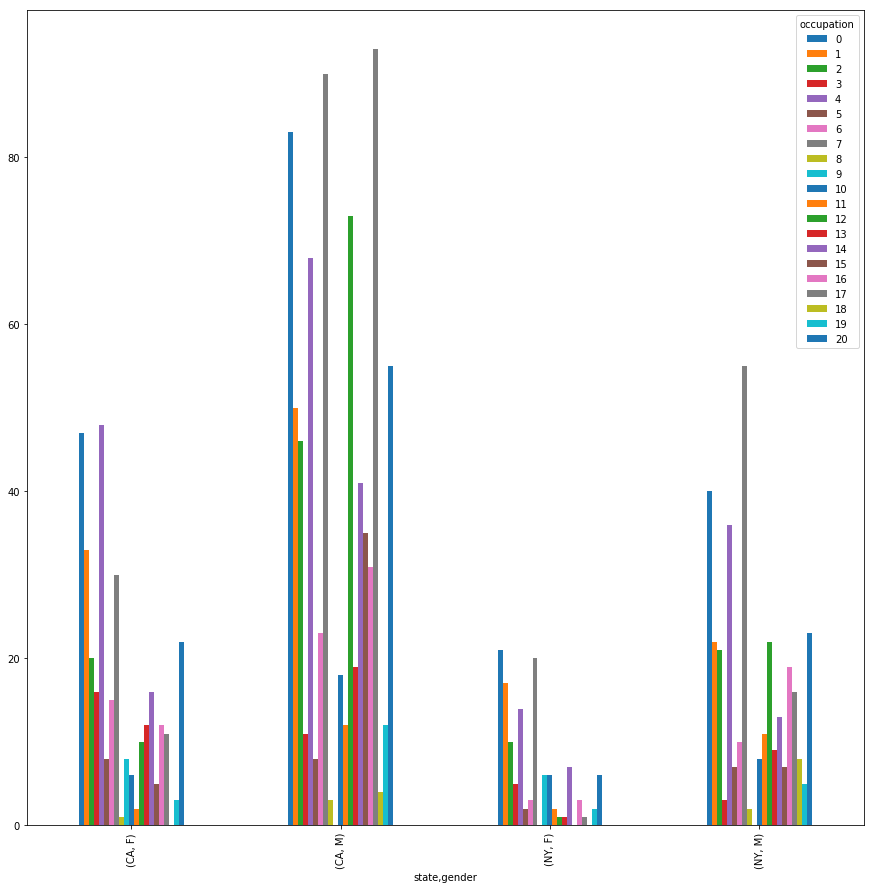

In [41]:
canymf = full[state_mask].groupby(["state", "gender", "occupation"]).size()

canymf.unstack().plot(kind='bar',figsize=(15,15))

In [13]:
# users["gender"] = users["gender"].astype("category")
# users["gender"].cat.set_categories(["M","F"], inplace=True)

In [ ]:
# save to csv
# users.to_csv(path_or_buf=)